### sklearn中的多项式回归和Pipline

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x +2 + np.random.normal(0, 1, size=100)

多项式回归需对数据预处理

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X2,y)
y_predict = lin_reg.predict(X2)

In [13]:
lin_reg.coef_

array([0.        , 1.03145497, 0.50799827])

In [14]:
lin_reg.intercept_

1.9048131111912634

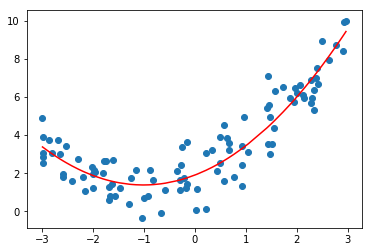

In [15]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')

### 关于PolynomialFeatures

In [16]:
X = np.arange(1, 11).reshape(5,2)

In [17]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [18]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [19]:
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

二次幂的特征x1**2,x2**2,x1*x2

### Pipeline

1.数据预处理（添加多项式项）
2.数据归一化（多项式数据差值巨大）
3.拟合

In [20]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x +2 + np.random.normal(0, 1, size=100)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ('poly',PolynomialFeatures(degree=2)),
    ('std_scaler',StandardScaler()),
    ('lin_reg',LinearRegression())
])

In [22]:
poly_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [23]:
y_predict = poly_reg.predict(X)

In [ ]:
plt.scatter(x, y)
